# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

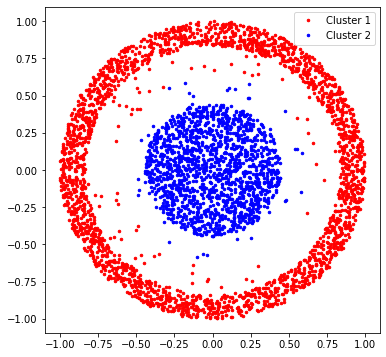

In [3]:
# Uncomment following two line and choose proper parameters

# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph
k_in_knn_graph = 120
threshold = 0.2
W = knn_graph(X, k_in_knn_graph, threshold)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

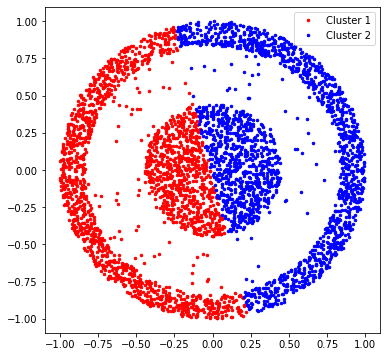

In [4]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [5]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [7]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
from spectral import spectral
from kmeans import kmeans
# YOUR CODE HERE
# begin answer
N = 10
spectral_average_ac = 0
spectral_average_mi = 0
kmeans_average_ac = 0
kmeans_average_mi = 0
for i in range(N):
    W = constructW(fea, k=50).toarray()
    spectral_index = spectral(W, np.unique(gnd).shape[0])
    spectral_result = bestMap(gnd, spectral_index)
    spectral_accuracy  = np.where(gnd == spectral_result)[0].shape[0] / len(spectral_result)
    spectral_average_ac += spectral_accuracy
    spectral_mutualInformation = MutualInfo(gnd, spectral_result)
    spectral_average_mi += spectral_mutualInformation

    kmeans_index = kmeans(x=fea.toarray(), k=np.unique(gnd).shape[0])
    kmeans_result = bestMap(gnd, kmeans_index)
    kmeans_accuracy = np.where(gnd == kmeans_result)[0].shape[0] / len(kmeans_result)
    kmeans_average_ac += kmeans_accuracy
    kmeans_mutualInformation = MutualInfo(gnd, kmeans_result)
    kmeans_average_mi += kmeans_mutualInformation

print('Spectral Clustering: Accuracy={}, mutual information={}\n'.format(spectral_average_ac/N, spectral_average_mi/N))
print('kmeans: Accuracy={}, mutual information={}\n'.format(kmeans_average_ac/N, kmeans_average_mi/N))

# end answer

Spectral Clustering: Accuracy=0.5782410917361638, mutual information=0.6684473568298703

kmeans: Accuracy=0.5134950720242608, mutual information=0.36631839357492624

